 ### Task 1: Data Quality
 ## 1.structured data

In [ ]:
ID	class	name	course	score
1372557	A	John	math	72
1425474	C	Ben	math	85.0 
1372558	a	John	math	72
1325390	A	Anna	mathematics	76
1492872	B	Mark	math	633

Here is an example of poor quality structured data. Though it has only 5 samples, there are a lot of problems.  
1.Two samples are duplicated, where the data both indicate John's math scores.  
2.The second sample of John, his class is wrongly written 'a'.  
3.Anna's course is wrongly written 'mathematics', while others are 'math'.  
4.Ben's math score is kept to one decimal place, which is inconsistent with other data.  
5.Mark's math score is far more than 100, which seems to be recorded incorrectly.

For a good structured data, it should be processed as some tables. These tables should meet with the three normal form of database (1NF, 2NF, 3NF). For example, the primary key in a table needs to be unique, while the foreign key needs to point to the primary key of another table. Each feature in the table needs to be specified the data type (such as: int、string）.

## 2.unstructured data

┻┳|  
┳┻| _  
┻┳| •.•) Rockstar, Are The Hackers Gone?  
┳┻|⊂ﾉ  
┻┳|  
/﹋\  
(҂`_´) -AH HELL NO! GO BACK INSIDE!  
<,︻╦╤─ ҉  
/﹋\﻿  
  

This is an example of poor quality unstructured data from Steam's game commons(Someone). From this character painting, We can easily see that a man is poking his head out of the wall and another man is shooting fiercely. They are talking about *Rockstar* which is the company made game *GTA5* (Grand Theft Auto V). If you are not familiar with this game, you have no idea what they are talking about. When we are prepare to do NLP, this will be even worse. Because computer is hard to read these characters and know its meaning. 

A good non-structure data need to include the information that we want to know. For example, A document for sentiment analysis should contain sentiment tendency words (such as: good、nice、bad、worse). These data should also be easily analyzed by automated programs. If a comment using ‘gooood’ ‘niccce’ instead of normal words, which is difficult to be processed.

 ### Task 2: Yield Curve Modeling
 ## 1.data processing

In [2]:
# Loading libraries
import pandas as pd
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Download China treasury bonds yield data from AKShare
import akshare as ak
bond_china_yield_df = ak.bond_china_yield(start_date="20210201", end_date="20220201")
print(bond_china_yield_df)
yields = bond_china_yield_df[bond_china_yield_df['曲线名称'] == '中债国债收益率曲线'] # We only need Yield curve of China National Debt.

# Data preprocessing  
yields.set_index('日期', inplace=True)  
yields.index = pd.to_datetime(yields.index) # Turn the index to time format
yields.drop(columns=['曲线名称'], inplace=True)  # Delete name column
yields.columns = ['3 Month', '6 Month', '1 Year', '3 Year', '5 Year', '7 Year', '10 Year', '30 Year'] # Rename columns for clarity
yields.loc['2021-12-10'] # Now we only focus on date '2021-12-10'

                    曲线名称          日期      3月      6月      1年      3年      5年  \
0      中债中短期票据收益率曲线(AAA)  2021-02-01  3.2000  3.2000  3.2441  3.6556  3.8008   
1    中债商业银行普通债收益率曲线(AAA)  2021-02-01  3.1085  3.0780  3.0708  3.4459  3.6463   
2              中债国债收益率曲线  2021-02-01  2.4501  2.4235  2.6043  2.8464  2.9899   
3              中债国债收益率曲线  2021-02-02  2.4001  2.4001  2.6227  2.8669  3.0102   
4      中债中短期票据收益率曲线(AAA)  2021-02-02  3.0242  3.1250  3.1934  3.6424  3.8127   
..                   ...         ...     ...     ...     ...     ...     ...   
748  中债商业银行普通债收益率曲线(AAA)  2022-01-29  2.3008  2.4055  2.4566  2.6766  3.0401   
749            中债国债收益率曲线  2022-01-29  1.7876  1.8941  1.9512  2.2327  2.3682   
750    中债中短期票据收益率曲线(AAA)  2022-01-30  2.4486  2.4786  2.4883  2.7475  3.1677   
751  中债商业银行普通债收益率曲线(AAA)  2022-01-30  2.2908  2.4036  2.4566  2.6630  3.0265   
752            中债国债收益率曲线  2022-01-30  1.7756  1.8882  1.9514  2.2318  2.3634   

         7年     10年     30年  
0    3.99

C:\Users\85346\AppData\Local\Temp\ipykernel_17044\3897120833.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields.drop(columns=['曲线名称'], inplace=True)  # Delete name column


3 Month    2.3201
6 Month    2.3545
1 Year     2.2767
3 Year     2.5956
5 Year     2.7236
7 Year     2.8723
10 Year    2.8426
30 Year    3.3747
Name: 2021-12-10 00:00:00, dtype: float64

Akshare is a financial data interface library based on python (AKShare). It insists on providing open source financial data, mainly about the Chinese market. Here we use its api for loading China treasury bonds yield data. We adjust the data format to make the same as the examples in M1L3 Lesson Notes. We can see that in this data, China treasury bonds has a range of maturities, but no '1 Month' and '2 Year'. 

 ## 2.Nelson-Siegel model

NelsonSiegelCurve(beta0=3.658740965277316, beta1=-1.3817167750371386, beta2=-0.004367314632396202, tau=6.571965333147492)


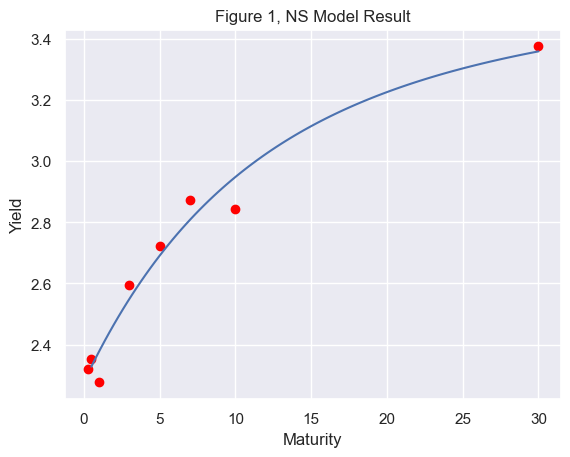

In [4]:
# Create maturity and yield variables in array form
t = np.array([0.25,0.5,1,3,5,7,10,30]) # 0.25 year is 3 months and 0.5 year is 6 months
y = np.array(yields.loc["2021-12-10"])
# Fit an NS model for yields from 2021-12-10
curve, status = calibrate_ns_ols(t, y, tau0=1)  # Select parameter tau0 equal 1
assert status.success # Check if the status is successful
print(curve)
# Draw yield curve using NS model
y_hat = curve
t_hat = np.linspace(0.5,30,100) # The x-axis range from 0.5 to 300 and are divided into 100 points
plt.plot(t_hat, y_hat(t_hat)) # y_hat(t_hat) is the estimated value of NS model at these 100 points
plt.scatter(t, y, c="red") # The red dot is the true points
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 1, NS Model Result")
plt.show()

In Nelson-Siegel model, Tau0 is the attenuation rate between 0-1. The larger the tau0, the smoother the curve, and the smaller the tau0, the more like a skewed peak. Here we let tau0 equal 1. From Figure 1, we can see that the yield curve is a smooth curve of gradually decline in growth rate. Actually, even if parameter tau0 equals 0.5, the curve shape shows almost the same, unless it drops to 0.

## 3.Cubic-Spline model

We using the same way as M1L3 Lesson Notes to solve the equation set. Because the data has no '2 Year' maturity, we use '1 Year' instead of it.
<br>
$$f\left( x \right)=a_{1}x^{3}+b_{1}x^{2}+c_{1}x+d_{1}, \text{when }1\le x\le 5$$
$$f\left( x \right)=a_{2}x^{3}+b_{2}x^{2}+c_{2}x+d_{2}, \text{when }5\le x\le 10$$
$$f\left( x \right)=a_{3}x^{3}+b_{3}x^{2}+c_{3}x+d_{3}, \text{when }10\le x\le 30$$
<br>
Solving this equation set, we get 12 equations just like below. Actually, if we want to fit curves based on more maturities, we can list more equations to solve multistages curves. But here we just use 4 maturities for simplicity.
<br>
$$a_{1}(1)^{3}+b_{1}(1)^{2}+c_{1}(1)+d_{1}=2.2767\;\;\;(1)$$
$$a_{1}(5)^{3}+b_{1}(5)^{2}+c_{1}(5)+d_{1}=2.7236\;\;\;(2)$$
$$a_{2}(5)^{3}+b_{2}(5)^{2}+c_{2}(5)+d_{2}=2.7236\;\;\;(3)$$
$$a_{2}(10)^{3}+b_{2}(10)^{2}+c_{2}(10)+d_{2}=2.8426\;\;\;(4)$$
$$a_{3}(10)^{3}+b_{3}(10)^{2}+c_{3}(10)+d_{3}=2.8426\;\;\;(5)$$
$$a_{3}(30)^{3}+b_{3}(30)^{2}+c_{3}(30)+d_{3}=3.3747\;\;\;(6)$$
$$3a_{1}(5)^{2}+2b_{1}(5)+c_{1}=3a_{2}(5)^{2}+2b_{2}(5)+c_{2}\;\;\;(7)$$
$$3a_{2}(10)^{2}+2b_{2}(10)+c_{2}=3a_{3}(10)^{2}+2b_{3}(10)+c_{3}\;\;\;(8)$$
$$6a_{1}(5)+2b_{1}=6a_{2}(5)+2b_{2}\;\;\;(9)$$
$$6a_{2}(10)+2b_{2}=6a_{3}(10)+2b_{3}\;\;\;(10)$$
$$6a_{1}(1)+2b_{1}=0\;\;\;(11)$$
$$6a_{3}(30)+2b_{3}=0\;\;\;(12)$$
<br>
<br>
$$\begin{bmatrix}
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
125 & 25 & 5 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 125 & 25 & 5 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1000 & 100 & 10 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1000 & 100 & 10 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 27000 & 900 & 30 & 1 \\
 75 & 10 & 1 & 0 & -75 & -10 & -1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 300 & 20 & 1 & 0 & -300 & -20 & -1 & 0 \\
 30 & 2 & 0 & 0 & -30 & -2 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 60 & 2 & 0 & 0 & -60 & -2 & 0 & 0 \\
 6 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 180 & 2 & 0 & 0
\end{bmatrix}\bullet\begin{bmatrix}
a_{1} \\
b_{1} \\
c_{1} \\
d_{1} \\
a_{2} \\
b_{2} \\
c_{2} \\
d_{2} \\
a_{3} \\
b_{3} \\
c_{3} \\
d_{3}
\end{bmatrix}=\begin{bmatrix}
2.2767 \\
2.7236 \\
2.7236 \\
2.8426 \\
2.8426 \\
3.3747 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}$$
<br>

In [7]:
# Get the parameters of Cubic-Spline model
yields.loc["2021-12-10"] # Check the yields on "2021-12-10"
t = np.array([1,5,10,30])
y = np.array([yields.loc["2021-12-10",'1 Year'], yields.loc["2021-12-10",'5 Year'], 
              yields.loc["2021-12-10",'10 Year'], yields.loc["2021-12-10",'30 Year']])
# Solving equations in matrix form
out = np.array([yields.loc["2021-12-10",'1 Year'], yields.loc["2021-12-10",'5 Year'],
                yields.loc["2021-12-10",'5 Year'], yields.loc["2021-12-10",'10 Year'],
                yields.loc["2021-12-10",'10 Year'], yields.loc["2021-12-10",'30 Year'], 
                0, 0, 0, 0, 0, 0])
input = np.array([[1,1,1,1,0,0,0,0,0,0,0,0],
                  [125,25,5,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,125,25,5,1,0,0,0,0],
                  [0,0,0,0,1000,100,10,1,0,0,0,0], 
                  [0,0,0,0,0,0,0,0,1000,100,10,1],
                  [0,0,0,0,0,0,0,0,27000,900,30,1],
                  [75,10,1,0,-75,-10,-1,0,0,0,0,0],
                  [0,0,0,0,300,20,1,0,-300,-20,-1,0], 
                  [30,2,0,0,-30,-2,0,0,0,0,0,0],
                  [0,0,0,0,60,2,0,0,-60,-2,0,0],
                  [6,2,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,180,2,0,0]])
lines = np.round(np.dot(np.linalg.inv(input), out).reshape(-1,4),decimals=8)
lines # get the parameters
# Define a function to calculate estimates on points
def plot_num(values, coeffs):
    # Coeffs are assumed to be in order 0, 1, ..., n-1
    expanded = np.hstack([coeffs[i] * (values ** i) for i in range(0, len(coeffs))])
    return np.sum(expanded, axis=1)

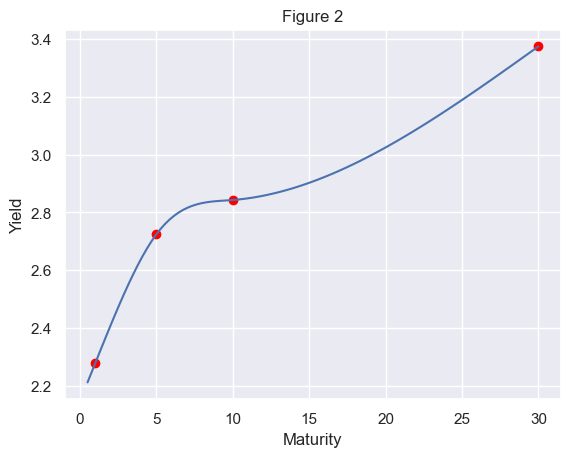

In [8]:
# Draw yield curve using Cubic-Spline model
xs = np.linspace(0.5, 30, 100) # The x-axis range from 0.5 to 300 and are divided into 100 points
y1s = plot_num(xs[xs<5].reshape(-1,1), lines[0][::-1]) # Use the first spline when t is less than 5
y2s = plot_num(xs[(xs>=5) & (xs<10)].reshape(-1,1), lines[1][::-1]) # Use the second spline when t is more than 5 and less than 10
y3s = plot_num(xs[xs>=10].reshape(-1,1), lines[2][::-1]) # Use the third spline when t is more than 10
ys = np.concatenate([y1s, y2s, y3s])
plt.plot(xs, ys)
plt.scatter(t, y, c="red") # The red dot is the true points
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 2")
plt.show()

From the yield curve of Cubic-Spline model, we can see that the curve is accurately passing all the true points. In terms of fitting degree, Cubic-Spline model seems to fit better than Cubic-Spline model. The curve shows an approximately concave increasing curve. Because the increase rate of '10 Year' treasury bond is less than '5 Year' and '30 Year'. 

Compared with the Cubic-Spline model, the curve of NS model is smoother and monotone, which means that with the growth of maturity, the yield will gradually increase. This is generally in line with reality, because long-term bonds have greater risks and should have higher yields than short-term bonds.

 ### Task 4: Empirical Analysis of ETFs
 ## 1.data processing

We choose XLRE (Real Estate Select Sector SPDR Fund) as the object of empirical analysis of ETFs. From website stockanalysis, we know that it holdings 34 stocks as of 2025-04-10 (Stock Analysis). From large to small, these companies are AMT(American Tower Corporation), PLD(Prologis, Inc.), WELL(Welltower Inc.), EQIX(Equinix, Inc.), O(Realty Income Corporation) etc. Here we only select the largest 30 companies from 2024-10-01 to 2025-04-01 for analysing.

In [9]:
import yfinance as yfin
import datetime
# The 30 largest holdings
holdinglist = ['AMT','PLD','WELL','EQIX','O',
 'SPG','DLR','PSA','CCI','CBRE',
 'CSGP','VICI','VTR','EXR','AVB',
 'IRM','SBAC','EQR','WY','MAA',
 'INVH','ESS','KIM','DOC','UDR',
 'CPT','ARE','REG','HST','BXP']

# Download stock prices
start = datetime.date(2024, 10, 1)
end = datetime.date(2025, 4, 1)
stocks = yfin.download(holdinglist, start, end, auto_adjust = False)["Adj Close"]
stocks.index = pd.to_datetime(stocks.index).strftime("%Y-%m-%d")
stocks.head()

[*********************100%***********************]  30 of 30 completed


Ticker,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SPG,UDR,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-01,226.501465,113.934204,218.664963,77.488686,123.750000,115.293449,120.491730,74.650002,157.894058,22.018900,...,122.443291,353.166382,70.811119,240.313217,165.556030,43.548424,31.879160,62.956051,126.386658,33.258919
2024-10-02,226.316040,113.087791,219.560532,77.936028,124.989998,112.070152,120.216545,75.110001,157.233978,21.698380,...,122.020767,348.497498,69.712212,239.649658,164.569809,43.752102,31.879160,62.315556,125.841789,33.179966
2024-10-03,223.778412,112.251106,217.198608,77.624832,122.519997,110.627899,118.703026,73.900002,154.968079,21.581825,...,119.917976,346.241547,69.672958,237.609421,164.384293,43.354443,31.684595,61.655350,125.277130,32.498997
2024-10-04,218.293274,111.784126,217.513535,78.519531,120.839996,107.907944,118.781654,74.099998,154.672531,21.484699,...,120.291367,338.787048,69.515968,233.112930,165.585312,43.247753,31.538671,61.615932,124.385544,32.449650
2024-10-07,218.010223,110.480461,214.541443,77.702637,119.220001,107.636902,117.592468,73.300003,154.150391,21.377857,...,117.913445,340.071960,69.084259,235.430511,163.554321,42.879192,31.538671,61.704617,123.107605,32.420044


In [10]:
# calculate the percent returns
stocks_returns = stocks.dropna().pct_change()
stocks_returns = stocks_returns.dropna()
stocks_returns.head()

Ticker,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SPG,UDR,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-02,-0.000819,-0.007429,0.004096,0.005773,0.010020,-0.027957,-0.002284,0.006162,-0.004181,-0.014557,...,-0.003451,-0.013220,-0.015519,-0.002761,-0.005957,0.004677,0.000000,-0.010174,-0.004311,-0.002374
2024-10-03,-0.011213,-0.007399,-0.010758,-0.003993,-0.019762,-0.012869,-0.012590,-0.016110,-0.014411,-0.005372,...,-0.017233,-0.006473,-0.000563,-0.008513,-0.001127,-0.009089,-0.006103,-0.010595,-0.004487,-0.020524
2024-10-04,-0.024511,-0.004160,0.001450,0.011526,-0.013712,-0.024587,0.000662,0.002706,-0.001907,-0.004500,...,0.003114,-0.021530,-0.002253,-0.018924,0.007306,-0.002461,-0.004606,-0.000639,-0.007117,-0.001518
2024-10-07,-0.001297,-0.011662,-0.013664,-0.010404,-0.013406,-0.002512,-0.010012,-0.010796,-0.003376,-0.004973,...,-0.019768,0.003793,-0.006210,0.009942,-0.012266,-0.008522,0.000000,0.001439,-0.010274,-0.000912
2024-10-08,0.004074,0.002114,0.002294,0.012766,0.015182,0.008094,0.002842,0.025239,0.011568,-0.008632,...,-0.005500,0.003548,-0.003551,0.003828,-0.001612,-0.002488,-0.003084,-0.003833,0.004024,0.007915


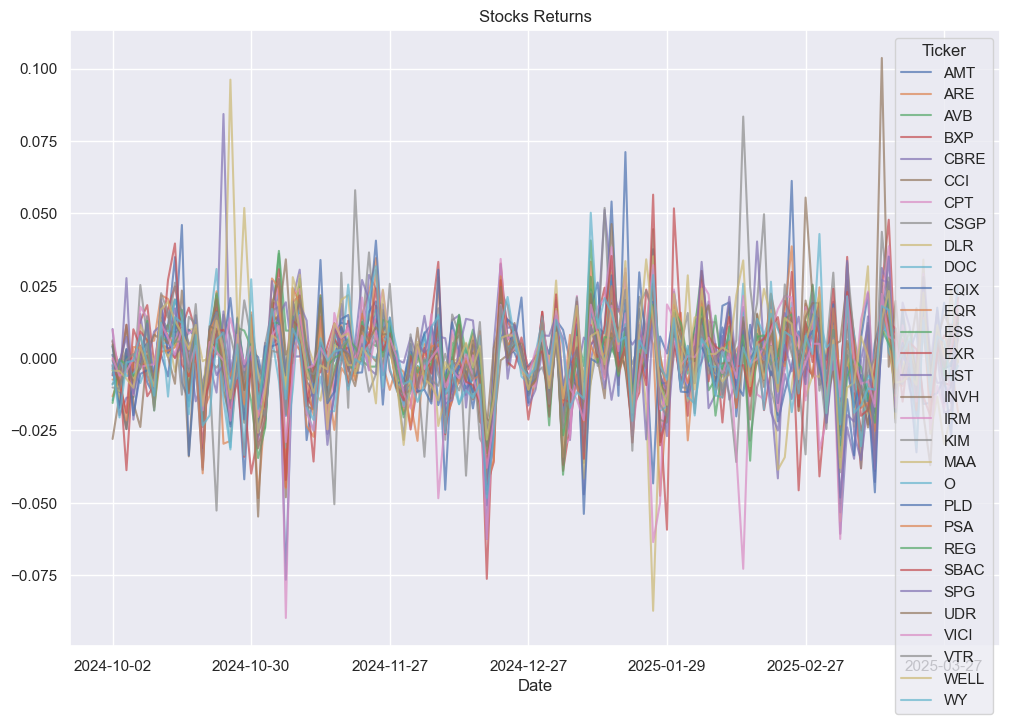

In [11]:
# Figure 1
stocks_returns.plot(figsize=(12, 8), title='Stocks Returns', alpha=0.7)
plt.show()

Figure 1 shows these 30 stocks' returns from 2024-10-01 to 2025-04-01. They all fluctuate around the 0 axis. Due to the variables are too many, the image is very complex.  

In [12]:
# Standardize the stock returns dataset
stocks_returns_means = stocks_returns.mean()
stocks_returns_stds = stocks_returns.std()
standardized_returns = (stocks_returns - stocks_returns_means) / stocks_returns_stds
standardized_returns.head()
standardized_return_cov = standardized_returns.cov() # Covariance matrix 


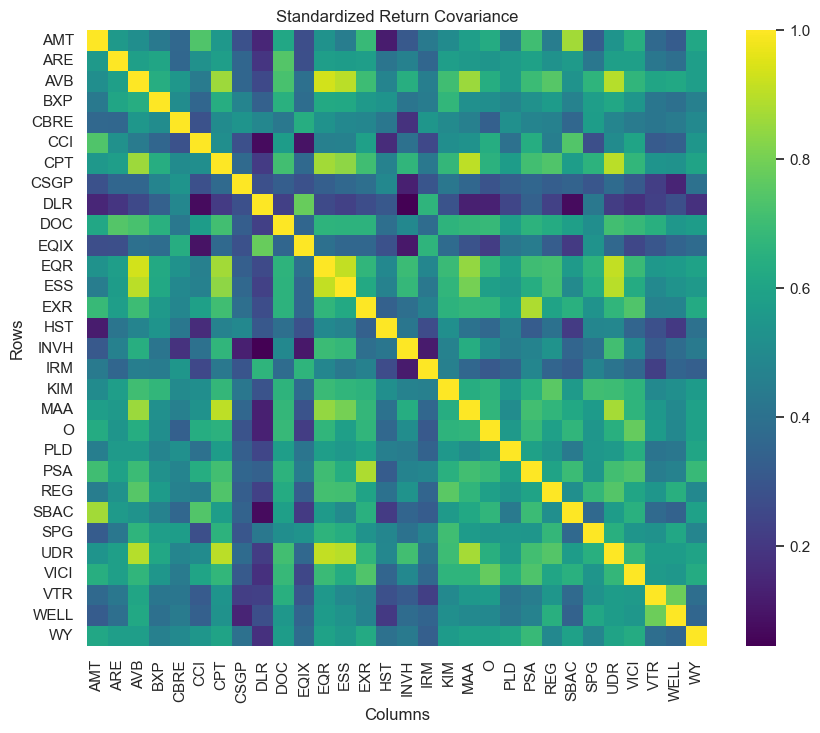

In [13]:
# Figure 2
plt.figure(figsize=(10, 8))  
sns.heatmap(standardized_return_cov, cmap='viridis') 
plt.title('Standardized Return Covariance')  
plt.xlabel('Columns')  
plt.ylabel('Rows')  
plt.show()  

From the covariance heatmap, we can see that some stocks are high correlated. For example, AVB(AvalonBay Communities, Inc.) and EQR(Equity Residential), UDR(UDR, Inc.) and CPT(Camden Property Trust), CPT and MAA(Mid-America Apartment Communities, Inc.), they all have correlation coefficient more than 0.7. 

## 2.PCA (Principal Component Analysis)

In [15]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)  # Set the number of components is 5
return_pca = pca.fit_transform(standardized_returns)  
df_return_pca = pd.DataFrame(return_pca, index = standardized_returns.index)
df_return_pca.head
# Get eigenvalues 
pca_eigenvalues = pca.explained_variance_  
# Get eigenvectors
pca_eigenvectors = pca.components_ 
loadings = pd.DataFrame(pca_eigenvectors.T, index = standardized_returns.columns)  
print(loadings.head)
# The top three stocks of each principal component
loadings.nlargest(3, 0)
loadings.nlargest(3, 1)
loadings.nlargest(3, 2)
loadings.nlargest(3, 3)
loadings.nlargest(3, 4)


<bound method NDFrame.head of                0         1         2         3         4
Ticker                                                  
AMT     0.172637 -0.176925  0.394875  0.073108 -0.111939
ARE     0.179366 -0.072435  0.092639 -0.134739  0.159825
AVB     0.222903 -0.006500 -0.197697  0.023013 -0.147017
BXP     0.181588  0.104654 -0.027637 -0.210452  0.153221
CBRE    0.157473  0.307589  0.091991 -0.055201  0.097446
CCI     0.158272 -0.251799  0.299231  0.010067 -0.006287
CPT     0.221237 -0.052237 -0.150357 -0.038276 -0.188519
CSGP    0.117400  0.156403  0.129410 -0.462557  0.257004
DLR     0.088661  0.482720  0.144590  0.105827 -0.126556
DOC     0.204793 -0.071606  0.024763  0.063769  0.175609
EQIX    0.122286  0.447525  0.135626  0.130040 -0.163695
EQR     0.222537 -0.017066 -0.186014 -0.011796 -0.229333
ESS     0.212321 -0.015454 -0.222991 -0.063849 -0.218570
EXR     0.204147 -0.052520  0.180652  0.030116 -0.045200
HST     0.132980  0.162945 -0.180916 -0.466943  0.222328
I

,0,1,2,3,4
Ticker,,,,,
VTR,0.161234,0.008385,-0.143573,0.383691,0.406556
WELL,0.161410,0.057338,-0.169903,0.472565,0.263441
CSGP,0.117400,0.156403,0.129410,-0.462557,0.257004


We have gotten 5 principal components. The top three stocks of each principal component are as below.    
First principal component: AVB, UDR, EQR. Mainly about the residential investment market.   
Second principal component: DLR, EQIX, IRM. Mainly about basic data facilities.  
Third principal component: AMT, SBAC, CCI. Mainly about communication infrastructure.  
Fourth principal component: WELL, VTR, EQIX. Mainly about health industry and data companies.  
Fifth principal component: VTR, WELL, CSGP. Others.

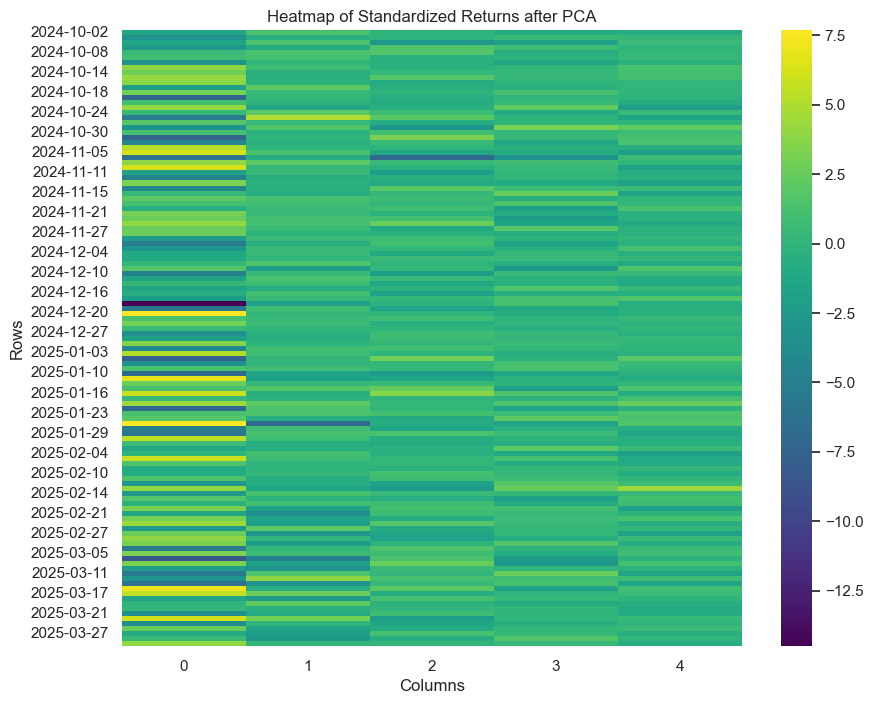

In [16]:
# Figure 3
plt.figure(figsize=(10, 8))  
sns.heatmap(df_return_pca, cmap='viridis') 
plt.title('Heatmap of Standardized Returns after PCA')  
plt.xlabel('Columns')  
plt.ylabel('Rows')  
plt.show()  

Figure 3 shows that the first principal component indicates the most differences in volatility, while the others are less fluctuating.

## 3.SVD (Singular Value Decomposition)

In [17]:
from sklearn.decomposition import TruncatedSVD
# Use Truncated SVD
trun_svd = TruncatedSVD(n_components=5)
trun_svd_matrix = trun_svd.fit_transform(standardized_return_cov)
df_trun_svd = pd.DataFrame(trun_svd_matrix, index = standardized_return_cov.index)
df_trun_svd.head
# Get eigenvalues 
svd_eigenvalues = trun_svd.explained_variance_  
# Get eigenvectors
svd_eigenvectors = trun_svd.components_ 
# Compare with PCA
svd_principal_components = trun_svd.fit_transform(standardized_returns) 
svd_principal_components = pd.DataFrame(svd_principal_components , index = standardized_returns.index)
svd_principal_components.head

<bound method NDFrame.head of                    0         1         2         3         4
Date                                                        
2024-10-02 -1.407831  1.241173 -0.051643 -0.877653 -0.638563
2024-10-03 -3.125942 -0.487230 -0.146495  0.427633  0.183008
2024-10-04 -1.342203  1.377766 -2.707370 -1.754470  0.535117
2024-10-07 -2.465717 -0.889909  1.559071  0.731221 -0.047820
2024-10-08  0.424077  1.300656  1.744130 -0.553020  0.148675
...              ...       ...       ...       ...       ...
2025-03-25 -3.717197 -0.060713 -1.474620 -0.480854 -0.005431
2025-03-26  2.510413 -1.429561 -0.903571  0.256936  0.534985
2025-03-27 -1.085101 -2.223181  1.163741  0.201154 -0.481195
2025-03-28  0.478240 -2.555833 -0.615874  1.641548  0.022079
2025-03-31  3.983315  0.021182  0.016853  0.319821 -0.796052

[123 rows x 5 columns]>

Variable svd_principal_components is very closed to the value of df_return_pca from PCA. Though they are still a little difference, it may be different data formats by different functions.  
The difference between PCA and SVD is that PCA is generally used for reducing the dimension of data, which requires standardized preprocessing. SVD generally is used on the matrix to decompose it into two orthogonal matrices (if it is a square matrix) and a diagonal matrix.

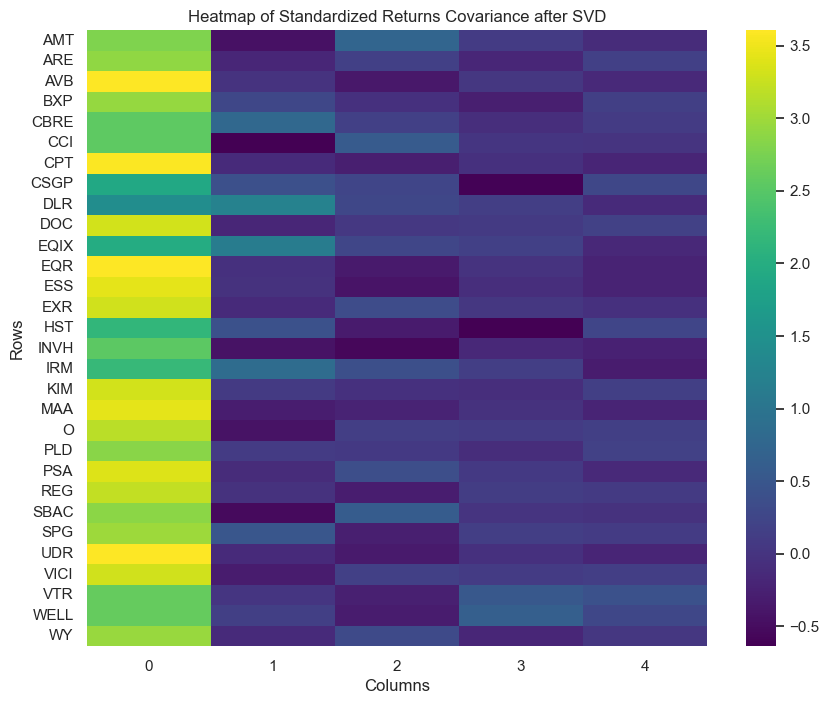

In [18]:
# Figure 4
plt.figure(figsize=(10, 8)) 
sns.heatmap(df_trun_svd, cmap='viridis')  
plt.title('Heatmap of Standardized Returns Covariance after SVD')  
plt.xlabel('Columns')  
plt.ylabel('Rows')  
plt.show()  

From Figure 4, we can also see that the first eigenvector retains the most information on covariance just like PCA.

### References

Someone. "Someone » Reviews » Grand Theft Auto V Legacy" Steam Community, 9 Jun 2016,  
https://steamcommunity.com/id/BrownShuggah/recommended/271590/

AKShare, "AKShare 债券数据", 14 Apr 2025,  
https://akshare.akfamily.xyz/data/bond/bond.html

Stock Analysis, "Real Estate Select Sector SPDR Fund (XLRE)", 10 Apr 2025,  
https://stockanalysis.com/etf/xlre/holdings/ 

Worldquant University, "financial-data: MODULE 1 | LESSON 3, GOVERNMENT BOND YIELD CURVE ANALYSIS", 11 Apr 2025,   
https://learn.wqu.edu/my-courses/courses/financial-data/modules/m-1-fixed-income-data/tasks/lesson-3-government-bond-yield-curve-analysis-lesson-notes

李航. 统计学习方法 (第2版). 清华大学出版社, 2019.

Worldquant University, "financial-data: MODULE 3 | LESSON 4, SINGULAR VALUE DECOMPOSITION OF MATRICES", 14 Apr 2025,   
https://learn.wqu.edu/my-courses/courses/financial-data/modules/m-3-working-with-portfolios-and-tick-data/tasks/lesson-4-singular-value-decomposition-of-matrices-lesson-notes

Litra LIN, sklearn实战之降维算法PCA与SVD, 21 Aug 2021,  
https://blog.csdn.net/qq_48314528/article/details/119845670

Worldquant University, "financial-data: MODULE 2 | LESSON 3, SPECIAL MATRICES FOR EQUITY ANALYSIS", 14 Apr 2025,   
https://learn.wqu.edu/my-courses/courses/financial-data/modules/m-2-equities-and-cryptocurrencies/tasks/lesson-3-special-matrices-for-equity-analysis-lesson-notes